In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
def readAll(filename):
    try:
        with open(filename,'r') as myFile:
            print(myFile.read(), end='')
    except IOError: 
        print("Error: File does not appear to exist.")   
    return

In [3]:
# readAll('../data/abalone.names')

In [4]:
"""
'Sex'		nominal			M, F, and I (infant)
	'Length'		continuous	mm	Longest shell measurement
	'Diameter'	continuous	mm	perpendicular to length
	'Height'		continuous	mm	with meat in shell
	'Whole weight'	continuous	grams	whole abalone
	'Shucked weight'	continuous	grams	weight of meat
	'Viscera weight'	continuous	grams	gut weight (after bleeding)
	'Shell weight'	continuous	grams	after being dried
	'Rings' Age
    """

"\n'Sex'\t\tnominal\t\t\tM, F, and I (infant)\n\t'Length'\t\tcontinuous\tmm\tLongest shell measurement\n\t'Diameter'\tcontinuous\tmm\tperpendicular to length\n\t'Height'\t\tcontinuous\tmm\twith meat in shell\n\t'Whole weight'\tcontinuous\tgrams\twhole abalone\n\t'Shucked weight'\tcontinuous\tgrams\tweight of meat\n\t'Viscera weight'\tcontinuous\tgrams\tgut weight (after bleeding)\n\t'Shell weight'\tcontinuous\tgrams\tafter being dried\n\t'Rings' Age\n    "

In [5]:
col_names = ['gender', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

In [6]:
df = pd.read_csv('../data/abalone.data', header=None, names=col_names)

In [7]:
df.head()

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df.tail()

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
gender            4177 non-null object
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


> No missing values!

However, there still might be missing values encoded with different values

In [10]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
df.corr()\
    .style\
    .background_gradient(cmap='RdBu_r', low=.5, high=0)\
    .highlight_null('red')

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.55672
diameter,0.986812,1,0.833684,0.925452,0.893162,0.899724,0.90533,0.57466
height,0.827554,0.833684,1,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1,0.969405,0.966375,0.955355,0.54039
shucked_weight,0.897914,0.893162,0.774972,0.969405,1,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1,0.907656,0.503819
shell_weight,0.897706,0.90533,0.817338,0.955355,0.882617,0.907656,1,0.627574
rings,0.55672,0.57466,0.557467,0.54039,0.420884,0.503819,0.627574,1


In [15]:
df2 = pd.get_dummies(df)

In [16]:
df2.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,gender_F,gender_I,gender_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [17]:
y = df2['rings']
y.head()

0    15
1     7
2     9
3    10
4     7
Name: rings, dtype: int64

In [18]:
X = df2.drop('rings', axis=1)

In [19]:
X.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,gender_F,gender_I,gender_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [20]:
X_train = df2.iloc[0:3133, :]
y_train = y.iloc[0:3133]

X_test = df2.iloc[3133:, :]
y_test = y.iloc[3133:]

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3133, 11), (3133,), (1044, 11), (1044,))

In [22]:
X_test.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,gender_F,gender_I,gender_M
3133,0.485,0.39,0.100,0.5565,0.2215,0.1155,0.185,9,1,0,0
3134,0.460,0.36,0.125,0.5470,0.2165,0.1105,0.190,8,0,0,1
3135,0.460,0.35,0.125,0.5165,0.1885,0.1145,0.185,9,0,0,1
3136,0.535,0.42,0.125,0.7640,0.3120,0.1505,0.265,11,0,0,1
3137,0.465,0.36,0.105,0.4880,0.1880,0.0845,0.190,10,0,0,1


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [24]:
clf = KNeighborsClassifier(n_neighbors=30)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [25]:
clf.fit(X=X_train,y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [26]:
metrics.accuracy_score(y_train, clf.predict(X_train))

0.967762527928503

In [27]:
y_pred = clf.predict(X=X_test)

In [24]:
y_pred

array([ 9,  8,  9, ...,  9, 10, 12], dtype=int64)

In [25]:
metrics.accuracy_score(y_test, y_pred)

0.9722222222222222

In [26]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.82      1.00      0.90        14
           5       1.00      0.88      0.93        24
           6       0.96      0.93      0.94        69
           7       0.94      1.00      0.97        81
           8       1.00      1.00      1.00       140
           9       1.00      1.00      1.00       167
          10       1.00      1.00      1.00       159
          11       1.00      1.00      1.00       140
          12       1.00      1.00      1.00        67
          13       0.95      1.00      0.98        59
          14       1.00      0.91      0.95        33
          15       0.96      1.00      0.98        26
          16       1.00      0.95      0.98        22
          17       0.61      1.00      0.76        11
          18       0.62      0.42      0.50        12
          19       1.00      0.62      0.77         8
          20       0.71    

C:\Users\ilyas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ilyas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ilyas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


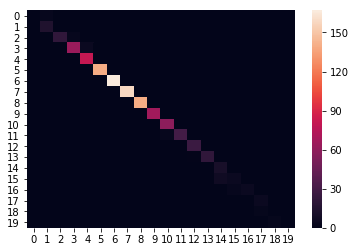

In [98]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred));

In [30]:
for k in [1,3,5,7,9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn.score(X_train, y_train)
    print(k, knn.score(X_train, y_train))

1 1.0
3 0.998084902649218
5 0.997127353973827
7 0.994573890839451
9 0.992339610596872
